# Predicting success of your app idea

### Based on the data you input, there will be two predictions made: 
1. number of ratings, 
2. average rating

In [82]:
# Setup libraries
import pandas as pd
import numpy as np

In [83]:
# setup datasets to use
app_metrics = pd.read_csv('AppleStore.csv')
app_description_data = pd.read_csv('appleStore_description.csv')

In [84]:
app_metrics.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [85]:
app_description_data.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [86]:
# Combine the two datasets
app_metrics['description'] = app_description_data['app_desc']
app_metrics.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,description
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


In [87]:
app_metrics[app_metrics['currency'] != 'USD'].count()
# All price data is in USD!

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
description         0
dtype: int64

In [88]:
# Convert bytes to mb
app_metrics['size_mb'] = round(app_metrics['size_bytes'] / (1024*1024),1)
app_metrics.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,description,size_mb
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.2
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.9
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.6
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.5


In [89]:
# One hot encoding for app genres
def create_dummy_variables(dataframe, heading):
    unique_genres = dataframe[heading].unique()
    for x in unique_genres:
        dataframe[x] = np.where(dataframe[heading] == x, 1, 0)
    
create_dummy_variables(app_metrics, 'prime_genre')

In [91]:
# Show all columns
pd.set_option('display.max_columns', None)
app_metrics.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,description,size_mb,Games,Productivity,Weather,Shopping,Reference,Finance,Music,Utilities,Travel,Social Networking,Sports,Business,Health & Fitness,Entertainment,Photo & Video,Navigation,Education,Lifestyle,Food & Drink,News,Book,Medical,Catalogs
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


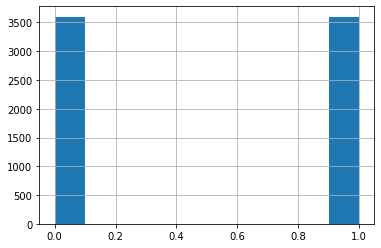

In [107]:
# Create classification of successful. Choose a rating of 300+ so that 
# successful, unsuccessful are roughly 50% each way
app_metrics['successful'] = np.where(app_metrics['rating_count_tot'] > 300, 1, 0)
success_of_categories = app_metrics['successful'].hist()

In [115]:
app_metrics.groupby('prime_genre').successful.mean().sort_values
# Only 15% of books were successful, whereas 65% of business apps were successful
# This shows that this feature should provide us with lot's of explanatory power. 

<bound method Series.sort_values of prime_genre
Book                 0.151786
Business             0.649123
Catalogs             0.400000
Education            0.350993
Entertainment        0.484112
Finance              0.336538
Food & Drink         0.412698
Games                0.512688
Health & Fitness     0.572222
Lifestyle            0.437500
Medical              0.434783
Music                0.637681
Navigation           0.391304
News                 0.440000
Photo & Video        0.610315
Productivity         0.595506
Reference            0.546875
Shopping             0.573770
Social Networking    0.574850
Sports               0.438596
Travel               0.456790
Utilities            0.487903
Weather              0.513889
Name: successful, dtype: float64>

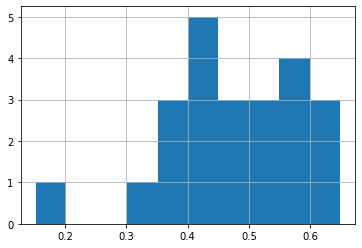

In [116]:
app_metrics.groupby('prime_genre').successful.mean().hist()